In [11]:
# OneWay ANOVA 单因素方差检验
# 用来比较不同分组的数据是否有显著的差异F值（F值 = 组间差异 / 组内差异）
# 以及这种显著差异是随机的可能性有多大P值（P越小，说明这种差异越不是随机，而是相关的）
# 用法，修改以下超参数即可
# 超参数
VAULE_X = 'wc_night'
VAULE_Y = 'amount'

import pandas as pd

# 读取excel文件并获取指定列
# df = pd.read_csv('Data\结果1_全站按日数据_最近2年数据.csv', usecols=['date', 'amount', 'order_cnt', 'text_day', 'text_night', 'high', 'low', 'wc_day', 'wd_day', 'wc_night', 'wd_night', 'week', 'holidays'], encoding='GBK')
df = pd.read_csv('Data\结果1_全站按日期分组_2023全年.csv', usecols=['date', 'amount', 'order_cnt', 'text_day', 'text_night', 'high', 'low', 'wc_day', 'wd_day', 'wc_night', 'wd_night', 'week', 'code_week','holidays', '305_price', '305_amount','305_refuelLiters', '313_price', '313_amount','313_refuelLiters' ], encoding='GBK')

In [12]:
#删除春节和元旦数据


# 使用 groupby 函数按天气分组，并获取每组的销量数据
value_X = VAULE_X
value_Y = VAULE_Y
coloum_groups = df.groupby(value_X)[value_Y].apply(list)
# 打印结果
for coloum, sales_array in coloum_groups.items():
    print(f"{coloum} 的销量数组: {sales_array}")

3~4级 的销量数组: [351609569.4, 381503210.1, 147753437.9, 280032597.8, 331553937.0, 364123637.2, 324780859.5, 356517273.9, 345688432.0, 360467330.0, 352361791.8, 347458696.1, 350412942.2, 337572326.6, 334785937.0, 329670821.0, 327647272.2, 347744905.2, 332419323.4, 355884776.1, 687776521.9, 337034424.5, 347529446.1, 341962362.8, 472176214.6, 720363247.4, 380371155.5, 367474418.0, 332479002.2, 345610407.9, 450511154.7, 403718016.9, 402870609.9, 331119748.5, 302005693.2, 387801535.1, 307323319.0, 313443632.7, 307561591.7, 359304407.6, 334997159.7, 320333494.7, 337588322.4, 276767353.7, 319125707.9, 374358489.2, 342427421.7, 470601074.5, 466065546.5, 400840728.2, 344147763.4, 347276374.4, 348428001.3, 344396424.1, 381189919.7, 427044086.7, 423460694.4, 488248702.2, 565945177.7, 455304466.7, 457729987.4, 455655186.8, 413046992.6, 422165717.5, 394991493.9, 407771372.0, 372120969.0, 428734338.0, 406711623.0, 339508379.1, 348665210.7, 436145922.2, 394148551.4, 356375500.2, 446788387.4, 362095244.7,

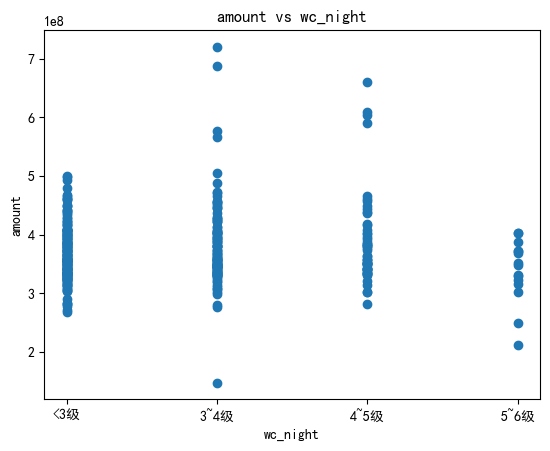

F 统计量: 3.5956002832578493
P 值: 0.013821175931605912


In [13]:
#画出散点图
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# 设置字体，确保能正确显示汉字
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体


# 绘制散点图
plt.scatter(df[value_X], df[value_Y])

# 添加标题和坐标轴标签
plt.title(value_Y+' vs '+value_X)
plt.xlabel(value_X)
plt.ylabel(value_Y)

# 显示图形
plt.show()

# 进行单因素方差分析
f_statistic, p_value = f_oneway(*coloum_groups)


# 打印结果
print("F 统计量:", f_statistic)
print("P 值:", p_value)

In [14]:

# <IQR法>去除所有value_Y(销量)里的异常值

# 计算指定列的下四分位数（Q1）和上四分位数（Q3）
q1 = df[value_Y].quantile(0.25)
q3 = df[value_Y].quantile(0.75)

# 计算 IQR
iqr = q3 - q1

# 定义上下界
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 删除异常值所在的行
df2 = df[(df[value_Y] >= lower_bound) & (df[value_Y] <= upper_bound)]


# 输出处理后的结果
print(df2.tail())

           date  order_cnt       amount text_day text_night  high  low wc_day  \
0      2023-1-1     902538  268544969.5        阴          阴     8    5    <3级   
1      2023-1-2    1066437  323796828.3        阴         多云     9    0    <3级   
2      2023-1-3    1216502  386938985.1       多云         多云     9    0    <3级   
3      2023-1-4     874633  271284119.0       多云         多云    12    3   3~4级   
4      2023-1-5     901227  283022796.0       多云         多云    13    2    <3级   
..          ...        ...          ...      ...        ...   ...  ...    ...   
359  2023-12-26    1072045  335929197.6        阴         多云     9    0   3~4级   
360  2023-12-27    1054896  332618128.4       多云          晴    12    0    <3级   
361  2023-12-28    1032115  323028612.7        晴         多云    12    3   3~4级   
362  2023-12-29    1218840  372592734.2       多云         小雨    12    5   3~4级   
363  2023-12-30    1126207  341635923.3        阴          晴    14    1    <3级   

    wd_day wc_night wd_nigh

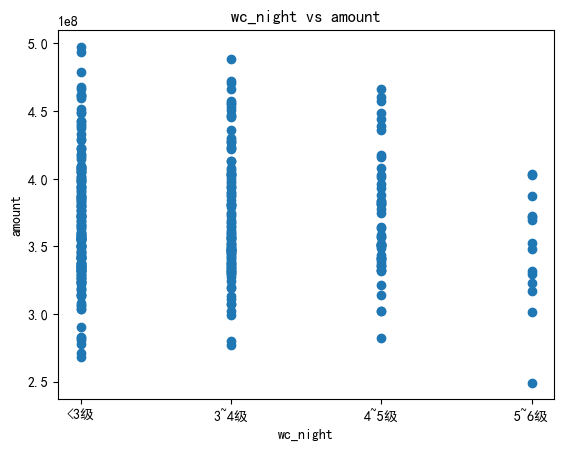

F 统计量: 1.3557603343886324
P 值: 0.25616907605042405


In [15]:

coloum_groups_df2 = df2.groupby(value_X)[value_Y].apply(list)


# 设置字体，确保能正确显示汉字
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体

# 绘制散点图
plt.scatter(df2[value_X], df2[value_Y])

# 添加标题和坐标轴标签
plt.title(value_X+' vs '+value_Y)
plt.xlabel(value_X)
plt.ylabel(value_Y)

# 显示图形
plt.show()

# 进行单因素方差分析
f_statistic, p_value = f_oneway(*coloum_groups_df2)

# 打印结果
print("F 统计量:", f_statistic)
print("P 值:", p_value)